<a href="https://colab.research.google.com/github/Roxoner44/Estudio-Clasificadores/blob/main/Practica_1_Sistemas_Inteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imprtar librerias e inicializar los datos

In [24]:
from sklearn import datasets
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier #importamos k vecinos
from sklearn.metrics import accuracy_score #funcion para obtener el % de acierto
from sklearn.metrics import confusion_matrix,classification_report 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV #para usar GridSearchCV y encontrar los mejores valores de clasificaicon
from sklearn.tree import DecisionTreeClassifier #para el clasificador de arbol de decision
from sklearn.svm import SVC #para el clasificador support vector machine
from sklearn.neural_network import MLPClassifier #para el caslificador de red neuronal
from sklearn.tree import export_graphviz
import graphviz

import numpy as np
import pandas as pd
from sklearn import preprocessing




iris = datasets.load_iris()
x = iris.data #4 aracteristicas
t = iris.target #0,1,2

tam_test = 0.3 # cogemos el 30% para tests
semilla = 7 #seed rand
xe,xt,te,tt = model_selection.train_test_split(x,t,test_size=tam_test,random_state=semilla)

# tt taget pruebas test
# xt muestras test
# xe muestras para entrenar
# te target muestras entrenamiento

# Ejercicio 1

## KVecinos

In [25]:
for i in range(5,10):
  clasificador = KNeighborsClassifier(i)
  #prediccion
  clasificador.fit(xe,te)
  obtenido = clasificador.predict(xt)
  print('\nclasificacion %.4f' % accuracy_score(tt,obtenido))
  matriz_de_confusion=confusion_matrix(tt,obtenido)
  print('Matriz confusion con k=%d:\n'%i ,matriz_de_confusion)


clasificacion 0.9111
Matriz confusion con k=5:
 [[12  0  0]
 [ 0 15  1]
 [ 0  3 14]]

clasificacion 0.9111
Matriz confusion con k=6:
 [[12  0  0]
 [ 0 15  1]
 [ 0  3 14]]

clasificacion 0.9333
Matriz confusion con k=7:
 [[12  0  0]
 [ 0 15  1]
 [ 0  2 15]]

clasificacion 0.9111
Matriz confusion con k=8:
 [[12  0  0]
 [ 0 15  1]
 [ 0  3 14]]

clasificacion 0.9111
Matriz confusion con k=9:
 [[12  0  0]
 [ 0 14  2]
 [ 0  2 15]]


# Ejercicio 2

## SVC

In [27]:
for i in range(1,6):
  clasificador = SVC(C=i)
  #prediccion
  clasificador.fit(xe,te)
  obtenido = clasificador.predict(xt)
  print('\nclasificacion %.4f' % accuracy_score(tt,obtenido))
  matriz_de_confusion=confusion_matrix(tt,obtenido)
  print('Matriz confusion con C=%d:\n'%i ,matriz_de_confusion)


clasificacion 0.8889
Matriz confusion con C=1:
 [[12  0  0]
 [ 0 15  1]
 [ 0  4 13]]

clasificacion 0.9333
Matriz confusion con C=2:
 [[12  0  0]
 [ 0 14  2]
 [ 0  1 16]]

clasificacion 0.9333
Matriz confusion con C=3:
 [[12  0  0]
 [ 0 14  2]
 [ 0  1 16]]

clasificacion 0.9333
Matriz confusion con C=4:
 [[12  0  0]
 [ 0 14  2]
 [ 0  1 16]]

clasificacion 0.9556
Matriz confusion con C=5:
 [[12  0  0]
 [ 0 14  2]
 [ 0  0 17]]


## MLP

In [28]:
clasificador = MLPClassifier()
#prediccion
clasificador.fit(xe,te)
obtenido = clasificador.predict(xt)
print('\nclasificacion %.4f' % accuracy_score(tt,obtenido))
matriz_de_confusion=confusion_matrix(tt,obtenido)
print('Matriz confusion:\n' ,matriz_de_confusion)


clasificacion 0.9556
Matriz confusion:
 [[12  0  0]
 [ 0 14  2]
 [ 0  0 17]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Arbol de Decisión

In [29]:
for i in range(0,5):
  clasificador = DecisionTreeClassifier(random_state=i)
  #prediccion
  clasificador.fit(xe,te)
  obtenido = clasificador.predict(xt)
  print('\nclasificacion %.4f' % accuracy_score(tt,obtenido))
  matriz_de_confusion=confusion_matrix(tt,obtenido)
  print('Matriz confusion con random_state=%d:\n'%i ,matriz_de_confusion)


clasificacion 0.8889
Matriz confusion con random_state=0:
 [[12  0  0]
 [ 0 14  2]
 [ 0  3 14]]

clasificacion 0.9111
Matriz confusion con random_state=1:
 [[12  0  0]
 [ 0 14  2]
 [ 0  2 15]]

clasificacion 0.8667
Matriz confusion con random_state=2:
 [[12  0  0]
 [ 0 12  4]
 [ 0  2 15]]

clasificacion 0.9111
Matriz confusion con random_state=3:
 [[12  0  0]
 [ 0 14  2]
 [ 0  2 15]]

clasificacion 0.9111
Matriz confusion con random_state=4:
 [[12  0  0]
 [ 0 14  2]
 [ 0  2 15]]


# Ejercicio 3

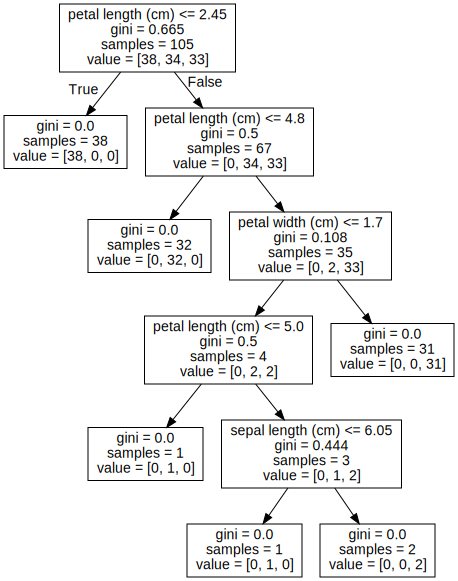

In [30]:
graphviz.Source(export_graphviz(clasificador, feature_names=iris.feature_names))

Calculamos importancia de las variables

In [31]:
importances = pd.DataFrame({'feature':iris.feature_names,'importance':np.round(
clasificador.feature_importances_,4)})
importances = importances.sort_values('importance',ascending=False)
print(importances)

             feature  importance
2  petal length (cm)      0.9556
3   petal width (cm)      0.0254
0  sepal length (cm)      0.0191
1   sepal width (cm)      0.0000


# Ejercicio 4

In [32]:
cancer = datasets.load_breast_cancer()

print(cancer.feature_names)

x=cancer.data
t=cancer.target


x_norm=preprocessing.scale(x)
tam_test = 0.3 # cogemos el 30% para tests
semilla = 7 #seed rand
xe,xt,te,tt = model_selection.train_test_split(x_norm,t,test_size=tam_test,random_state=semilla)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## KNeighbors

In [33]:
media =0
for i in range(1,10):
  clasificador = KNeighborsClassifier()
  #prediccion
  clasificador.fit(xe,te)
  obtenido = clasificador.predict(xt)
  media+=accuracy_score(tt,obtenido)
  print('\nclasificacion %.4f' % accuracy_score(tt,obtenido))
  print(classification_report(tt,obtenido))
  matriz_de_confusion=confusion_matrix(tt,obtenido)
  print('Matriz confusion con k=%d:\n'%i ,matriz_de_confusion)
print('\nMEDIA OBTENIDA :', media/9)



clasificacion 0.9591
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        55
           1       0.94      1.00      0.97       116

    accuracy                           0.96       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.96      0.96       171

Matriz confusion con k=1:
 [[ 48   7]
 [  0 116]]

clasificacion 0.9591
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        55
           1       0.94      1.00      0.97       116

    accuracy                           0.96       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.96      0.96       171

Matriz confusion con k=2:
 [[ 48   7]
 [  0 116]]

clasificacion 0.9591
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        55
           1       0.94      1.00      0.97       116

    accuracy    

## SVC

In [34]:
media =0
for i in range(1,10):
  clasificador = SVC()
  #prediccion
  clasificador.fit(xe,te)
  obtenido = clasificador.predict(xt)
  media+=accuracy_score(tt,obtenido)
  print('\nclasificacion %.4f' % accuracy_score(tt,obtenido))
  print(classification_report(tt,obtenido))
  matriz_de_confusion=confusion_matrix(tt,obtenido)
  print('Matriz Confusión:\n',matriz_de_confusion)
print('\nMEDIA OBTENIDA :', media/9)


clasificacion 0.9766
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        55
           1       0.97      1.00      0.98       116

    accuracy                           0.98       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.98      0.98      0.98       171

Matriz Confusión:
 [[ 51   4]
 [  0 116]]

clasificacion 0.9766
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        55
           1       0.97      1.00      0.98       116

    accuracy                           0.98       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.98      0.98      0.98       171

Matriz Confusión:
 [[ 51   4]
 [  0 116]]

clasificacion 0.9766
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        55
           1       0.97      1.00      0.98       116

    accuracy                    

## DecisionTreeClassifier

In [35]:
media =0 
for i in range(1,10):
  clasificador = DecisionTreeClassifier()
  #prediccion
  clasificador.fit(xe,te)
  obtenido = clasificador.predict(xt)
  media+=accuracy_score(tt,obtenido)
  print('\nclasificacion %.4f' % accuracy_score(tt,obtenido))
  print(classification_report(tt,obtenido))
  matriz_de_confusion=confusion_matrix(tt,obtenido)
  print('Matriz Confusión:\n',matriz_de_confusion)

print('\nMEDIA OBTENIDA :', media/9)



clasificacion 0.9357
              precision    recall  f1-score   support

           0       0.92      0.87      0.90        55
           1       0.94      0.97      0.95       116

    accuracy                           0.94       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171

Matriz Confusión:
 [[ 48   7]
 [  4 112]]

clasificacion 0.9064
              precision    recall  f1-score   support

           0       0.90      0.80      0.85        55
           1       0.91      0.96      0.93       116

    accuracy                           0.91       171
   macro avg       0.90      0.88      0.89       171
weighted avg       0.91      0.91      0.90       171

Matriz Confusión:
 [[ 44  11]
 [  5 111]]

clasificacion 0.9064
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        55
           1       0.92      0.95      0.93       116

    accuracy                    

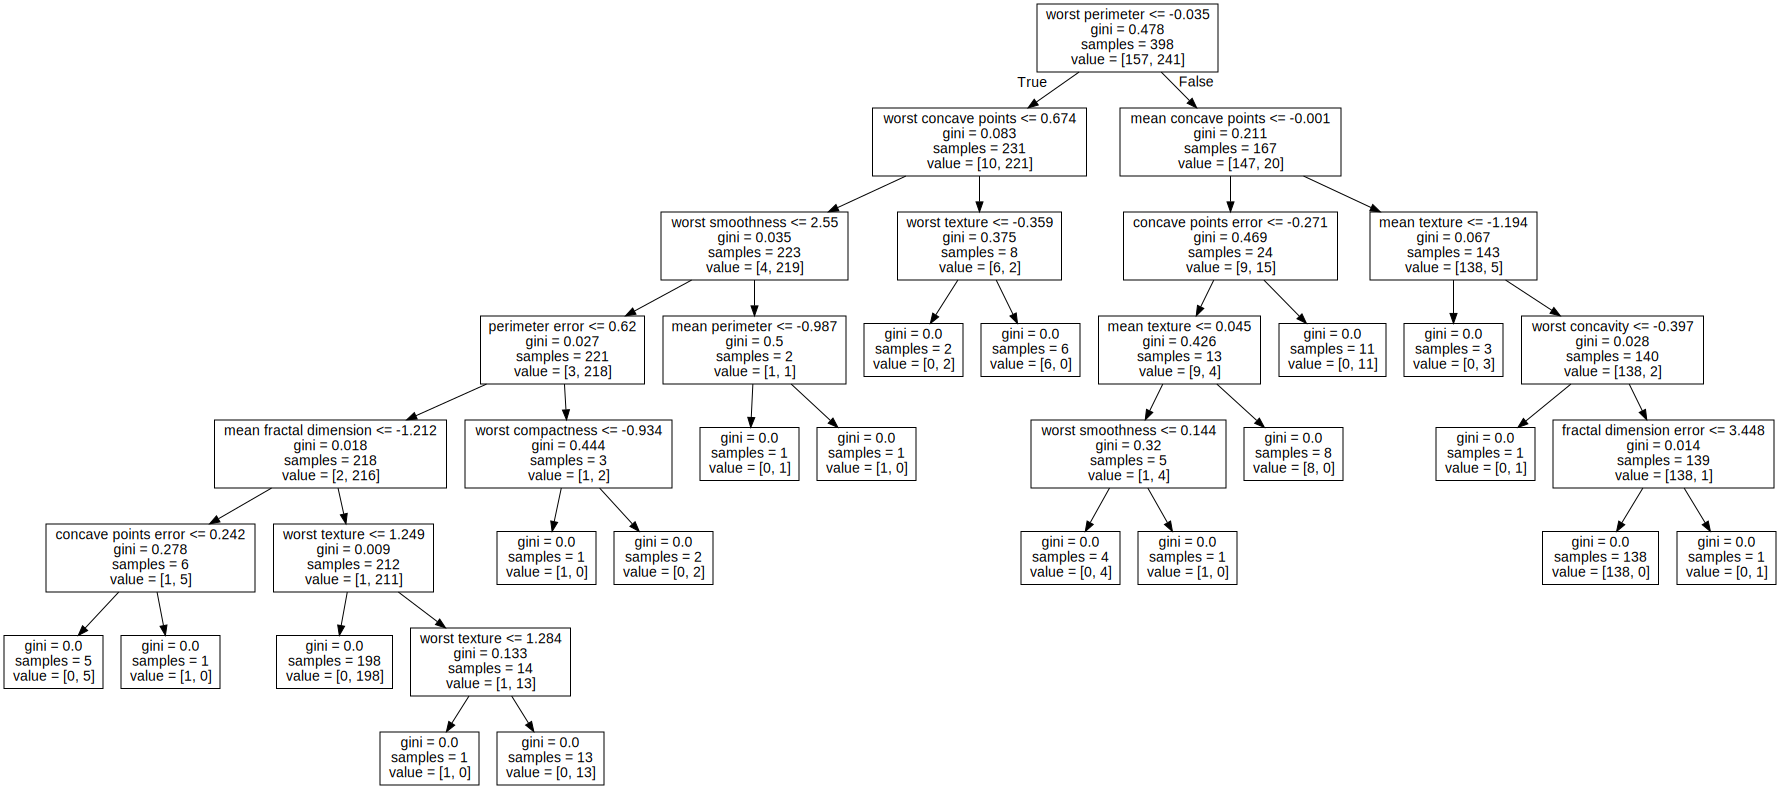

In [36]:
graphviz.Source(export_graphviz(clasificador, feature_names=cancer.feature_names))

In [37]:
importances = pd.DataFrame({'feature':cancer.feature_names,'importance':np.round(
clasificador.feature_importances_,4)})
importances = importances.sort_values('importance',ascending=False)
print(importances)


                    feature  importance
22          worst perimeter      0.7142
7       mean concave points      0.0753
1              mean texture      0.0507
27     worst concave points      0.0435
17     concave points error      0.0388
21            worst texture      0.0262
24         worst smoothness      0.0133
19  fractal dimension error      0.0104
26          worst concavity      0.0103
25        worst compactness      0.0070
2            mean perimeter      0.0053
12          perimeter error      0.0033
9    mean fractal dimension      0.0016
23               worst area      0.0000
20             worst radius      0.0000
18           symmetry error      0.0000
28           worst symmetry      0.0000
0               mean radius      0.0000
15        compactness error      0.0000
16          concavity error      0.0000
14         smoothness error      0.0000
13               area error      0.0000
11            texture error      0.0000
10             radius error      0.0000


## MLPClassifier

In [38]:
media =0
for i in range(1,10):
  clasificador = MLPClassifier()
  #prediccion
  clasificador.fit(xe,te)
  obtenido = clasificador.predict(xt)
  media+=accuracy_score(tt,obtenido)
  print('\nclasificacion %.4f' % accuracy_score(tt,obtenido))
  print(classification_report(tt,obtenido))
  matriz_de_confusion=confusion_matrix(tt,obtenido)
  print('Matriz confusion:\n',matriz_de_confusion)
print('\nMEDIA OBTENIDA :', media/9)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



clasificacion 0.9825
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        55
           1       0.97      1.00      0.99       116

    accuracy                           0.98       171
   macro avg       0.99      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171

Matriz confusion:
 [[ 52   3]
 [  0 116]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



clasificacion 0.9825
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        55
           1       0.97      1.00      0.99       116

    accuracy                           0.98       171
   macro avg       0.99      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171

Matriz confusion:
 [[ 52   3]
 [  0 116]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



clasificacion 0.9825
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        55
           1       0.97      1.00      0.99       116

    accuracy                           0.98       171
   macro avg       0.99      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171

Matriz confusion:
 [[ 52   3]
 [  0 116]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



clasificacion 0.9766
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        55
           1       0.97      1.00      0.98       116

    accuracy                           0.98       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.98      0.98      0.98       171

Matriz confusion:
 [[ 51   4]
 [  0 116]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



clasificacion 0.9825
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        55
           1       0.97      1.00      0.99       116

    accuracy                           0.98       171
   macro avg       0.99      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171

Matriz confusion:
 [[ 52   3]
 [  0 116]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



clasificacion 0.9708
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        55
           1       0.96      1.00      0.98       116

    accuracy                           0.97       171
   macro avg       0.98      0.95      0.97       171
weighted avg       0.97      0.97      0.97       171

Matriz confusion:
 [[ 50   5]
 [  0 116]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



clasificacion 0.9825
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        55
           1       0.97      1.00      0.99       116

    accuracy                           0.98       171
   macro avg       0.99      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171

Matriz confusion:
 [[ 52   3]
 [  0 116]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



clasificacion 0.9766
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        55
           1       0.97      1.00      0.98       116

    accuracy                           0.98       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.98      0.98      0.98       171

Matriz confusion:
 [[ 51   4]
 [  0 116]]

clasificacion 0.9766
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        55
           1       0.97      1.00      0.98       116

    accuracy                           0.98       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.98      0.98      0.98       171

Matriz confusion:
 [[ 51   4]
 [  0 116]]

MEDIA OBTENIDA : 0.9792072774528915


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# Ejercicio 5

Sin parametros

In [39]:
for i in range(0,5):
  clasificador = MLPClassifier()
  #prediccion
  clasificador.fit(xe,te)
  obtenido = clasificador.predict(xt)
  
  print('\nclasificacion %.4f' % accuracy_score(tt,obtenido))
  matriz_de_confusion=confusion_matrix(tt,obtenido)
  print('Matriz confusion con random_state=%d:\n'%i ,matriz_de_confusion)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



clasificacion 0.9766
Matriz confusion con random_state=0:
 [[ 51   4]
 [  0 116]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



clasificacion 0.9708
Matriz confusion con random_state=1:
 [[ 50   5]
 [  0 116]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



clasificacion 0.9825
Matriz confusion con random_state=2:
 [[ 52   3]
 [  0 116]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



clasificacion 0.9766
Matriz confusion con random_state=3:
 [[ 51   4]
 [  0 116]]

clasificacion 0.9766
Matriz confusion con random_state=4:
 [[ 51   4]
 [  0 116]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


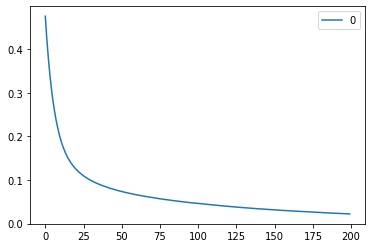

In [40]:
pd.DataFrame(clasificador.loss_curve_).plot()

Con hidden-layer_sizes=200, max_iter=300,activation='logistic'

In [41]:
for i in range(0,5):
  clasificador = MLPClassifier(hidden_layer_sizes=200, max_iter=300,activation='logistic')
  #prediccion
  clasificador.fit(xe,te)
  obtenido = clasificador.predict(xt)
  
  print('\nclasificacion %.4f' % accuracy_score(tt,obtenido))
  matriz_de_confusion=confusion_matrix(tt,obtenido)
  print('Matriz confusion con random_state=%d:\n'%i ,matriz_de_confusion)


clasificacion 0.9766
Matriz confusion con random_state=0:
 [[ 51   4]
 [  0 116]]

clasificacion 0.9825
Matriz confusion con random_state=1:
 [[ 52   3]
 [  0 116]]

clasificacion 0.9766
Matriz confusion con random_state=2:
 [[ 51   4]
 [  0 116]]

clasificacion 0.9825
Matriz confusion con random_state=3:
 [[ 52   3]
 [  0 116]]

clasificacion 0.9766
Matriz confusion con random_state=4:
 [[ 51   4]
 [  0 116]]


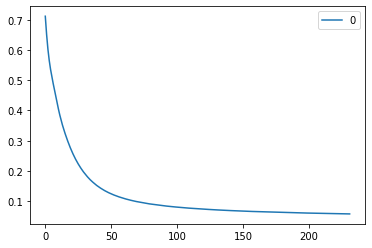

In [42]:
pd.DataFrame(clasificador.loss_curve_).plot()

Con hidden_layer_sizes=80,actiavion='logistic', solver= 'adam'

In [43]:
media =0
for i in range(0,5):
  clasificador = MLPClassifier(hidden_layer_sizes=80, activation='logistic', solver= 'adam')
  #prediccion
  clasificador.fit(xe,te)
  obtenido = clasificador.predict(xt)
  media+= accuracy_score(tt,obtenido)
  print('\nclasificacion %.4f' % accuracy_score(tt,obtenido))
  matriz_de_confusion=confusion_matrix(tt,obtenido)
  print('Matriz confusion con random_state=%d:\n'%i ,matriz_de_confusion)
print('Media obtenida: ', media/5)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



clasificacion 0.9766
Matriz confusion con random_state=0:
 [[ 51   4]
 [  0 116]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



clasificacion 0.9708
Matriz confusion con random_state=1:
 [[ 50   5]
 [  0 116]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



clasificacion 0.9766
Matriz confusion con random_state=2:
 [[ 51   4]
 [  0 116]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



clasificacion 0.9766
Matriz confusion con random_state=3:
 [[ 51   4]
 [  0 116]]

clasificacion 0.9766
Matriz confusion con random_state=4:
 [[ 51   4]
 [  0 116]]
Media obtenida:  0.9754385964912281


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


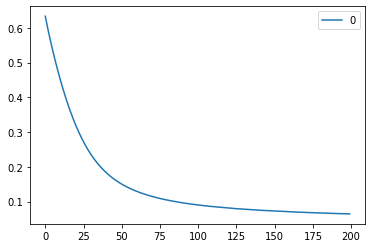

In [44]:
pd.DataFrame(clasificador.loss_curve_).plot()

# Ejercicio 6

In [45]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [46]:
media =0
for i in range(0,5):
  clasificador = RandomForestClassifier();
  #prediccion
  clasificador.fit(xe,te)
  obtenido = clasificador.predict(xt)
  media += accuracy_score(tt,obtenido)
  print('\nclasificacion %.4f' % accuracy_score(tt,obtenido))
  print(classification_report(tt,obtenido))
  matriz_de_confusion=confusion_matrix(tt,obtenido)
  print('Matriz confusion :\n' ,matriz_de_confusion)
print("\nMEDIA OBTENIDA : ", media/5)


clasificacion 0.9825
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.99       116

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Matriz confusion :
 [[ 54   1]
 [  2 114]]

clasificacion 0.9708
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        55
           1       0.97      0.99      0.98       116

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Matriz confusion :
 [[ 51   4]
 [  1 115]]

clasificacion 0.9883
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99       116

    accuracy                  

In [47]:
media =0
for i in range(0,5):
  clasificador = RandomForestClassifier(n_estimators=10,criterion = "entropy", max_depth=2);
  #prediccion
  clasificador.fit(xe,te)
  obtenido = clasificador.predict(xt)
  media += accuracy_score(tt,obtenido)
  print('\nclasificacion %.4f' % accuracy_score(tt,obtenido))
  print(classification_report(tt,obtenido))
  matriz_de_confusion=confusion_matrix(tt,obtenido)
  print('Matriz confusion :\n' ,matriz_de_confusion)
print("\nMEDIA OBTENIDA : ", media/5)


clasificacion 0.9357
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        55
           1       0.95      0.96      0.95       116

    accuracy                           0.94       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171

Matriz confusion :
 [[ 49   6]
 [  5 111]]

clasificacion 0.9357
              precision    recall  f1-score   support

           0       0.96      0.84      0.89        55
           1       0.93      0.98      0.95       116

    accuracy                           0.94       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.94      0.94      0.93       171

Matriz confusion :
 [[ 46   9]
 [  2 114]]

clasificacion 0.9298
              precision    recall  f1-score   support

           0       0.94      0.84      0.88        55
           1       0.93      0.97      0.95       116

    accuracy                  

In [48]:
param_N = list(range(1,100,10))
param_grid = {'n_estimators':param_N, 'criterion':['gini','entropy'],'max_depth': list(range(1,100))} 

grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=3,n_jobs=-1)

grid.fit(xe,te)
print(grid.best_params_)
grid_predictions = grid.predict(xt)
print(classification_report(tt, grid_predictions)) 

Fitting 5 folds for each of 1980 candidates, totalling 9900 fits
{'criterion': 'entropy', 'max_depth': 47, 'n_estimators': 31}
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        55
           1       0.96      0.99      0.97       116

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



In [49]:
media =0
for i in range(0,5):
  clasificador = RandomForestClassifier(criterion= 'entropy', max_depth= 64, n_estimators= 61);
  #prediccion
  clasificador.fit(xe,te)
  obtenido = clasificador.predict(xt)
  media += accuracy_score(tt,obtenido)
  print('\nclasificacion %.4f' % accuracy_score(tt,obtenido))
  print(classification_report(tt,obtenido))
  matriz_de_confusion=confusion_matrix(tt,obtenido)
  print('Matriz confusion :\n' ,matriz_de_confusion)
print("\nMEDIA OBTENIDA : ", media/5)


clasificacion 0.9708
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        55
           1       0.96      1.00      0.98       116

    accuracy                           0.97       171
   macro avg       0.98      0.95      0.97       171
weighted avg       0.97      0.97      0.97       171

Matriz confusion :
 [[ 50   5]
 [  0 116]]

clasificacion 0.9825
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        55
           1       0.98      0.99      0.99       116

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Matriz confusion :
 [[ 53   2]
 [  1 115]]

clasificacion 0.9766
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        55
           1       0.97      1.00      0.98       116

    accuracy                  